# Problem 2

In [30]:
import numpy as np
import matplotlib.pyplot as plt

The function below defines the hill-curve of a 2-repressor NOR gate, using dimensionless versions of all species to simplify interpretation. It accepts 2 inputs, r1 and r2, which are the concentrations of 2 different repressors; as well as the inputs n1 and n2, the Hill coefficients for each repressor (which default to 20, a biologically implausible value, exaggerated to illustrate the logic gate behavior more clearly). The output of the function is the concentration of the protein whose expression is regulated by repressors r1 and r2. Note you do not need to modify the code below, it is provided to you as you have already derived this equation in class.

In [31]:
### DO NOT MODIFY THIS CELL ###

def nor_gate(r1, r2, n1=20, n2=20,g_max=1):
    return 1/(1+r1**n1)/(1+r2**n2)*g_max

Visualize the truth table of this NOR-gate by running the cell below.

In [32]:
### YOU MAY MODIFY THIS CELL BUT WILL NOT BE GRADED ###

# Note: here we're treating this gate as digital by defining a concentration threshold
# for what constitutes a 1 or 0, ON or OFF, HIGH or LOW, etc. Feel free to change these 
# threshold values to see how they affect the output of the gate. Also feel free to play 
# with the value of n1 and n2 to see how they affect the digital behavior of the gate.

OFF_CONCENTRATION = 0.1
ON_CONCENTRATION = 4

n = 1.7

# generate truth table
print(f'R1     | R2     | OUT  ')
print(f'-----------------------')
for r1 in [OFF_CONCENTRATION, ON_CONCENTRATION]:
    for r2 in [OFF_CONCENTRATION, ON_CONCENTRATION]:
        print(f'{r1:<5.2f}  | {r2:<5.2f}  | {nor_gate(r1, r2,n1=n,n2=n,g_max=ON_CONCENTRATION):.2f}')

R1     | R2     | OUT  
-----------------------
0.10   | 0.10   | 3.85
0.10   | 4.00   | 0.34
4.00   | 0.10   | 0.34
4.00   | 4.00   | 0.03


Run the cell below to visualize the output of the nor gate for varying concentrations of the 2 input repressors. Try modifying the value of n to see how the contour changes with increased sensitivity to repressor binding (not graded).

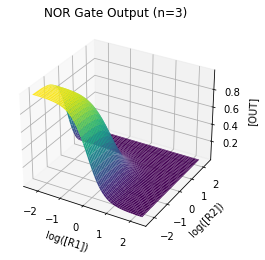

In [33]:
### YOU MAY MODIFY THIS CELL BUT WILL NOT BE GRADED ###

n = 3

# plot nor gate output in 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.logspace(-1, 1, 100)
X, Y = np.meshgrid(x, x)
Z = nor_gate(X, Y, n, n)
# plot surface as wireframe
ax.plot_surface(np.log(X), np.log(Y), Z, cmap='viridis')
# label x and y axes
ax.set_xlabel('log([R1])')
ax.set_ylabel('log([R2])')
# label z axis
ax.set_zlabel('[OUT]')
# set title
ax.set_title(f'NOR Gate Output (n={n})')
plt.show()

## 2.1

Now it's finally time to write your own code. Implement XOR logic using only NOR-gate building blocks. You should be able to achieve this with 5 NOR gates. See the HW PDF for more details/guidance.

Documents from Wikipedia that demonstrate how to achieve XOR using NOR gates. One of these produces the correct output, and the other does not.

working diagram: https://upload.wikimedia.org/wikipedia/commons/5/5e/XOR_from_NOR_2.svg

nonfunctional diagram: https://upload.wikimedia.org/wikipedia/commons/e/e3/XOR_from_NOR.svg

In [34]:
### MODIFY THIS CELL ###

# This is an alternative way of implementing XOR, but the output it 
# produces is not what is expected. It has been left in the code 
# just as a note that there are other ways of making an XOR gate
# which may have different results in the real world.
def alternative_xor_gate(a,b,n):
    not_a = nor_gate(a, a, n1=n, n2=n)
    not_b = nor_gate(b, b, n1=n, n2=n)
    nor_a_b = nor_gate(a, b, n1=n, n2=n)
    nor_nots_a_b = nor_gate(not_a, not_b, n1=n, n2=n)
    xor = nor_gate(nor_a_b, nor_nots_a_b, n1=n, n2=n)
    return xor

#   An implementation of XOR which produces the desired output.
def xor_gate(a,b,n):
    nor_a_b = nor_gate(a, b, n1=n, n2=n)
    nor_a_nor = nor_gate(a, nor_a_b, n1=n, n2=n)
    nor_b_nor = nor_gate(b, nor_a_b, n1=n, n2=n)
    neither = nor_gate(nor_a_nor, nor_b_nor, n1=n, n2=n)
    flip_sign = nor_gate(neither, neither, n1=n, n2=n)
    return flip_sign

Visualize the output of your XOR gate for n=2,4,20. Recall that the higher the value of n, the more digital the behavior of the logic gate (although super high values of n are probably not realistically achievable with biological components). You don't have to add any code to the following cell, only run it; if there is an error the error will be in your xor_gate function (we will be sad if anyone suggests there's a mistake in the plotting code). Do make sure you actually run this cell before submitting (we will not grade this problem otherwise)!!!

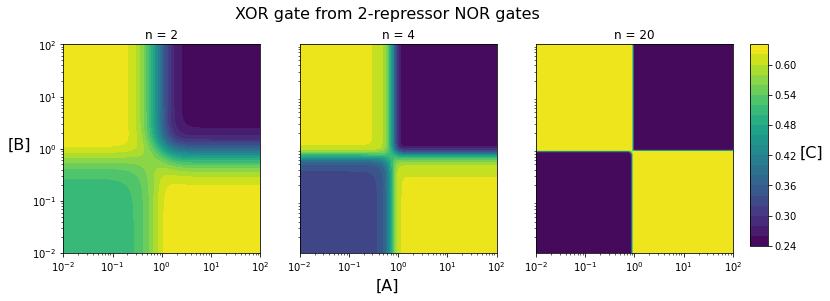

In [35]:
### DO NOT MODIFY THIS CELL ###

# meshgrid for plotting
x = np.logspace(-2, 2, 100)
x, y = np.meshgrid(x, x)

# Create 3 subplots for 3 values of n: 2, 4, and 20
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, n in enumerate([2, 4, 20]):
    ax[i].contourf(x, y, xor_gate(x, y, n), 20, cmap='viridis')
    ax[i].set_title('n = %d' % n)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')

### The following code is just to make the plots look nicer ###

# set title for overall figure
fig.suptitle('XOR gate from 2-repressor NOR gates\n',fontsize=16)
# add empty line between suptitle and subplot titles for spacing/presentation
fig.subplots_adjust(top=0.85)
# remove yticks from 2nd and 3rd subplots
ax[1].set_yticks([])
ax[2].set_yticks([])
# set ylabel for overall figure to [B]
fig.text(0.06, 0.5, '[B]', va='center', rotation='horizontal',fontsize=16)
# set xlabel for overall figure to [A]
fig.text(0.5, 0.01, '[A]', ha='center', va='center',fontsize=16)
# add colorbar to right of the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(ax[0].contourf(x, y, xor_gate(x, y, 2), 20, cmap='viridis'), cax=cbar_ax)
# add colorbar label
cbar_ax.set_ylabel('[C]', rotation=0, labelpad=15, fontsize=16)

plt.show()

## 2.2

This looks nice in simulation, but in reality there are many practical challenges for creating a logic gate like this XOR-gate from compounded 2-repressor NOR-gates. **List and explain 2 reasons why a cascaded 5-gate system like this XOR-gate might not behave the same way in real life as in simulation.**

1. The output requires five gates to successfully work in order to be correct, and the repression cascade that drives this process may be disfunctional. For example, if the output of one gate is "ON", but the concentration of repressor is not high enough to change the state of the next gate, then the XOR logic is broken.

2. With five gates, many different repressors are produced which may be toxic to the cell or inhibit its division. These defects would then affect how the logic gate functions in real life.

## 2.3 **(Grad Students Only)**

Notice that for both the n=2 and n=4 graphs, the bottom left quadrant is lighter colored than the upper right quadrant, indicating higher output concentration. However, both these quadrants correspond to "OFF" states of the XOR-gate. **In a few sentences explain why the lower left quadrant has a less digital "OFF" state than the upper right quadrant for lower values of n, including why this behavior is not observed in the n=20 graph.**

*This answer is also present in the PDF submitted.*

Hill functions are defined as the functions describing the phenomenon of how effectors may regulate gene
regulation, where n typically expresses the ultrasensitivity of the regulation and cooperativity. Biological
circuits modeled by the Hill coefficient with lower values of n look less digital due to the limits of
physiology. The two off states here are formed via different inputs of repressor protein concentration
where one is from an “on/on” path and the other is the result of an “off/off” path. This “off/off” input
appears to be yielding a higher output concentration at a level between the “off” and “on” state. We are
just modeling digital “on/off” gates by assuming strong repression/activation from these transcription
factors, but these have a degree of variability and noise from these states in real systems. This becomes
less apparent when chaining transcriptional logic gates together, thus attributing to the more digital look
in the system as the exponent n increases.

# Problem 3

In class you learned that the model for a bistable switch is given by the following equations :

\begin{align}
\dot{x} &= \frac{\alpha}{1+y^n} - x\\[1em]
\dot{y} &= \frac{\alpha}{1+x^n} - y,
\end{align}

Create the phase diagram for this system, i.e. generate a vector field showing the direction of
change of x and y. Also visualize the nullclines and equilibrium points on the same plot.
Which equilibrium points are stable, and which are unstable? 

You may use any tools at your
disposal for plotting the phase diagram (Python, Mathematica, Matlab etc.). We have provided partially completed Python code. Feel free to use or change anything in your implementation. Places where you will need to fill in code are marked as "TODO". 

Provide plots for n=1, n=2, and n=5. Use a=6.

In [36]:
import numpy as np
import scipy.integrate
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [37]:
### PURPOSE: calculate the derivatives at a certain point.

# TODO: this function returns the equations for a bistable switch
# function arguments: 
# xy: tuple with equation variables x and y
# a, n: function arguments that you will be changing 
# return type: numpy array

def bistable_switch(xy, a, n):
    x, y = xy
    xdot = a / (1 + y ** n) - x
    ydot = a / (1 + x ** n) - y
    return np.array([xdot, ydot])
    

In [38]:
### PURPOSE: calculate the flow field.
    
# Parameters:
# f : function for form f(y, *args). Must return a 2-array.
# x_range : array_like, shape (2,). Range of values for x-axis.
# y_range : array_like, shape (2,). Range of values for y-axis.
# args : tuple, default ()
# Additional arguments to be passed to f:
# n_grid : int, default 100
# Number of grid points to use in computing derivatives on phase portrait.
# Returns derivatives and x,y space

def get_flow_field(bistable_switch, x_range, y_range, args=(), n_grid=100):

    # Set up u,v space
    x = np.linspace(x_range[0], x_range[1], n_grid)
    y = np.linspace(y_range[0], y_range[1], n_grid)
    xx, yy = np.meshgrid(x, y)
    
    xsize = x_range[1] - x_range[0]
    ysize = y_range[1] - y_range[0]
    
    a, n = args
    
    # Compute derivatives and update numpy arrays u and v, where u[i,j] = dx[i,j]/dt and v[i,j] = dy[i,j]/dt
    u = np.empty_like(xx)
    v = np.empty_like(xx)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            u[i,j], v[i,j] = bistable_switch((x[i], y[j]), a, n)
            # computes derivatives for all values acrosss u,v space 

    return u, v, x, y


In [39]:
### PURPOSE: compute both the x and y nullclines.

### Notes
# definition of x-nullcline: the line on which the derivative with respect to x is 0.
# xdot = a / (1 + y ** n) - x
# 0 = a / (1 + y ** n) - x
# x = a / (1 + y ** n)
# similarly, for the y-nullcline, y = a / (1 + x ** n)

# Params
# xrange, yrange: arraylike, shape (2,). Respectively, ranges for x and y values
# a, n: standard values for bistability
def get_nullclines(x_range, y_range, a, n):
    
    # x-nullcline
    x_y = np.linspace(y_range[0], y_range[1], 200)
    x_x = a / (1 + x_y ** n)

    # y-nullcline
    y_x = np.linspace(x_range[0], x_range[1], 200)
    y_y = a / (1 + y_x ** n)
    
    return x_x, x_y, y_x, y_y


In [40]:
### PURPOSE: find a stable equilibrium point.

# Params
# x: an x value to test out
# a, n: standard
# return type: absolute value of the x-derivative, as computed assuming 
#              that ydot is 0. Serves as an objective value.

def eq_point_obj_function(x, a, n):
    y = a / (1 + x ** n)  # this assumes ydot is 0 (as it should be)
    xdot = a / (1 + y ** n) - x
    return abs(xdot)      # xdot being 0 is optimal (not negative)


# xrange: tuple which defines the range of x-values a solution will be
#         sought on
# a, n: standard arguments
# return type: x, y coords of an equilibrium point

# get_eq_points works by recognizing that because both xdot and ydot need to be zero, this
# optimization can be reduced to a single variable optimization.

def get_eq_points(xrange, a, n):
    result = scipy.optimize.minimize_scalar(eq_point_obj_function, bounds=xrange, args=(a, n))
    x = result['x']
    if not result['success']:
        print("There was an error with the optimization of the equilibrium points.")
    y = a / (1 + x ** n)
    return x, y
    

In [41]:
### PURPOSE: return all fixed points in a convenient format.

def get_fixed_points(a, n):
    # Find unstable fixed point
    coeffs = np.zeros(n+2)
    coeffs[0] = 1
    coeffs[-2] = 1
    coeffs[-1] = -a

    r = np.roots(coeffs)
    ind = np.where(np.logical_and(np.isreal(r), r.real >= 0))
    fp1 = np.array([r[ind][0].real]*2)

    # Find stable fixed points (fp0 and fp2)
    x1,y1 = get_eq_points((0,1), a, n)
    x2,y2 = fp1
    x3,y3 = y1, x1  # bistability equations are symmetric, so this is true.
    
    return np.array([[x1,y1], [x2,y2], [x3,y3]])

In [42]:
### PURPOSE: put all these functions together and output a graph.

def do_everything(a, n):
    arguments = (a, n)
    
    # Calculate the flow field
    u, v, x, y = get_flow_field(bistable_switch, [0,10], [0,10], arguments)
    
    # Calculate the nullclines
    x_x, x_y, y_x, y_y = get_nullclines([0,10], [0,10], a, n)
    
    # Calculate fixed points
    eq_points = get_fixed_points(a, n)
    
    # Configure plotting
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Bistable Switch: n = " + str(n))
    
    # Plot flowfield
    ax.streamplot(x, y, v, u)
    
    # Plot nullclines
    ax.plot(x_x, x_y)
    ax.plot(y_x, y_y)
    
    # Plot fixed points
    for xy in eq_points:
        x, y = xy
        ax.plot(x, y, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    
    plt.show()
    

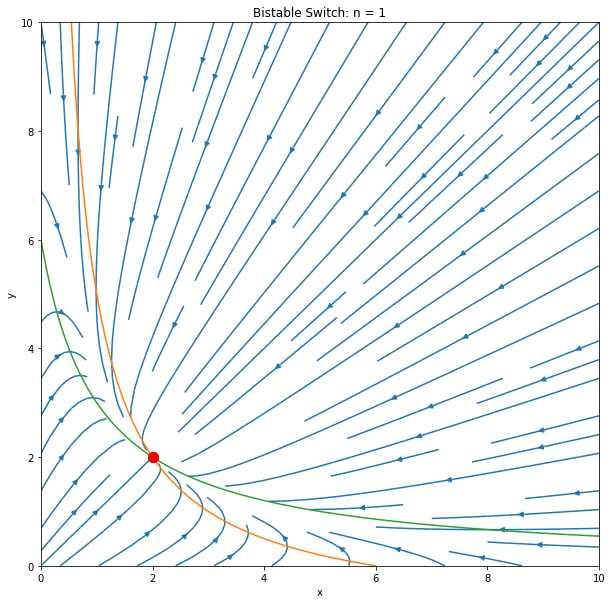

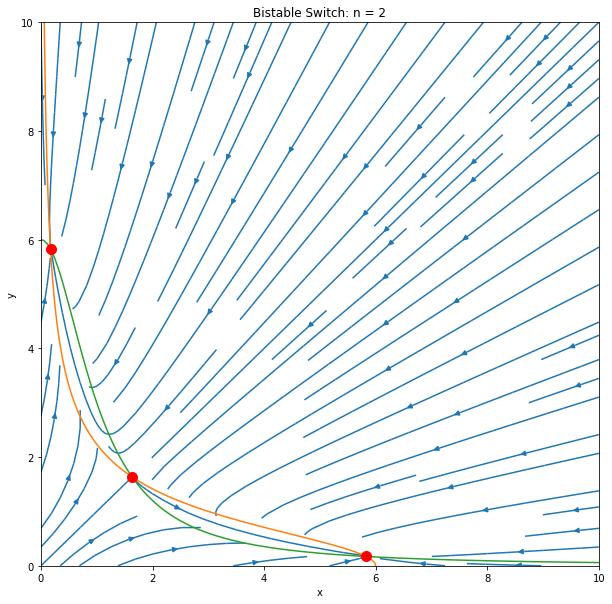

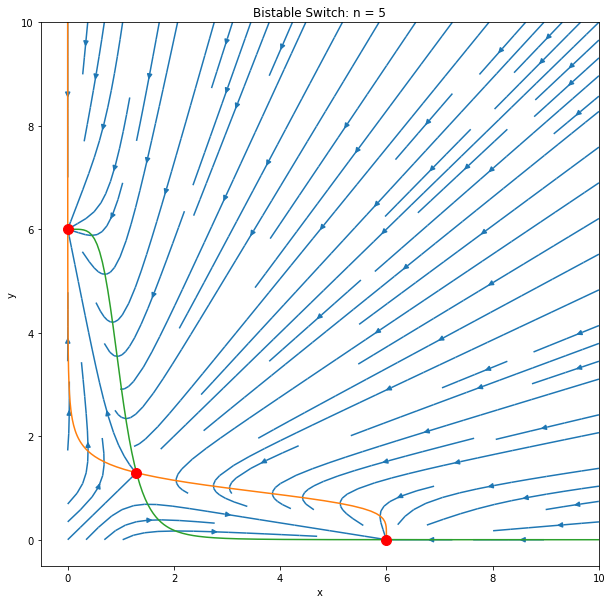

In [43]:
### PURPOSE: the function calls that execute everything necessary
#            for values of (a, n).

# in particular, a = 6, and n = 1, 2, 5

do_everything(6, 1)
do_everything(6, 2)
do_everything(6, 5)

#### Which Equilibrium Points are Stable

In the n=1 graph, there is only one equilibrium point, and it is stable. In the other two graphs, there are two points which are stable (each of them has a high concentration of x and a low concentration of y, or vice versa), and one point which is unstable that has an equal amount of x and y. This can be seen visually, as the arrows in the flow fields point towards the stable equilibrium points, but never point towards the unstable equilibrium point. This also shows that for n=1, it is impossible to be bistable, while for n=2 and n=5, there is bistability.